# Milestone report

## Instruction

You have proposed a project, collected a data set, cleaned up the data and explored it with descriptive and inferential statistics techniques. Now’s the time to take stock of what you’ve learned. The project milestone is an opportunity for you to practice your data story skills. Your milestone will be reached when you produce an early draft of your final Capstone report. This is a slightly longer (3-5 page) draft that should have the following:

An introduction to the problem: What is the problem? Who is the Client? (Feel free to reuse points 1-2 from your proposal document)
A deeper dive into the data set:
What important fields and information does the data set have?
What are its limitations i.e. what are some questions that you cannot answer with this data set?
What kind of cleaning and wrangling did you need to do?
Are there other datasets you can find, use and combine with, to answer the questions that matter?
Any preliminary exploration you’ve performed and your initial findings. Test the hypotheses one at a time. Often, the data story emerges as a result of a sequence of testing hypothesis e.g. You first tested if X was true, and because it wasn't, you tried Y, which turned out to be true.
Based on these findings, what approach are you going to take? How has your approach changed from what you initially proposed, if applicable?
Add your code and milestone report to the github repository. As before, once your mentor has approved your milestone document, please share the github repository URL on the community and ask the community for feedback.

While we require only one milestone report, we encourage you and your mentor to plan multiple milestones, especially for more complex projects.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

sns.set_style('white')

## Introduction

Crowdfunding has become a new and exciting way to get capitale and to invest. Lending club has jumped into the trend by offering loans with fixed interest rates and terms that the public can choose to invest in. Lending club screens the loans that are applied for and only 10% gets approved and is subsequently offered to the public. By investing a small proportion in many different loans investors can diversify their portfolio and in this way keep the default risk to a minimum (which is estimated by lending club to be 4%). For their services lending club asks a fee of 1%. For investors this is an interesting way to get profit on their investment since it supposedly gives more stable returns than the stock market and higher interest rates than a savings account. The profits depend on the interest rate and the default rate. Therefore it is interesting to see whether certain characteristics of the loan or the buyer give a bigger chance of default. And whether loans with higher interest rates have a bigger chance to default. 

For this project the lending club loans dataset is used from Kaggle. (https://www.kaggle.com/wendykan/lending-club-loan-data). Their file contains complete loans data for loans issued between 2007 and 2015. The client is the investor who wants to get the most profit on his portfolio of loans and wants to know whether investing with lending club is profitable. The problem is that some of the loans will not be fully paid, therefore interest rate is not the only interesting characteristic of the loan. We will therefore investigate the characteristics of the loans that have an effect on the chance a loan gets 'charged off'. 

## Data set

### loan status

The complete dataset consists of 887,379 loans with 74 features. We select only the loans that went to fullterm, because we don't know whether the loans that are still ongoing will end in 'charged off' or 'fully paid'. Most loans are current loans, but there are four categories of loans that went to full term: 'Fully Paid', 'Charged Off', 'Does not meet the credit policy. Status:Fully Paid', 'Does not meet the credit policy. Status:Charged Off'. When selecting only those categories, 255,720 of the loans are left of which most are 'fully paid'. 

In [2]:
loans = pd.read_csv('../data/loan.csv')
print(loans.shape)
closed_status = ['Fully Paid', 'Charged Off',
              'Does not meet the credit policy. Status:Fully Paid',
              'Does not meet the credit policy. Status:Charged Off']
closed_loans = loans[loans['loan_status'].isin(closed_status)]
print(closed_loans.shape)

(887379, 74)
(255720, 74)


/Users/ro.d.bruijn/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


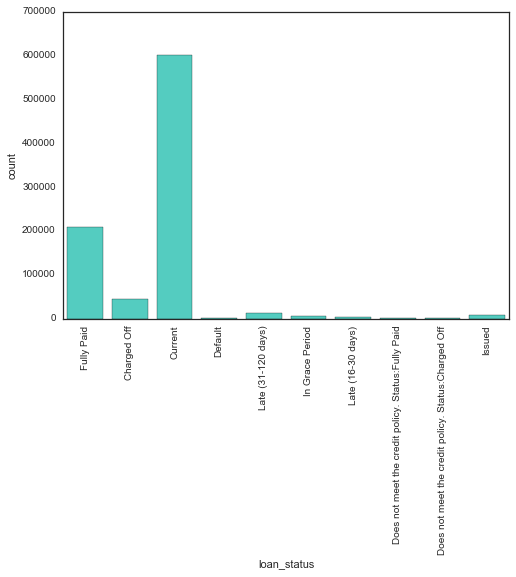

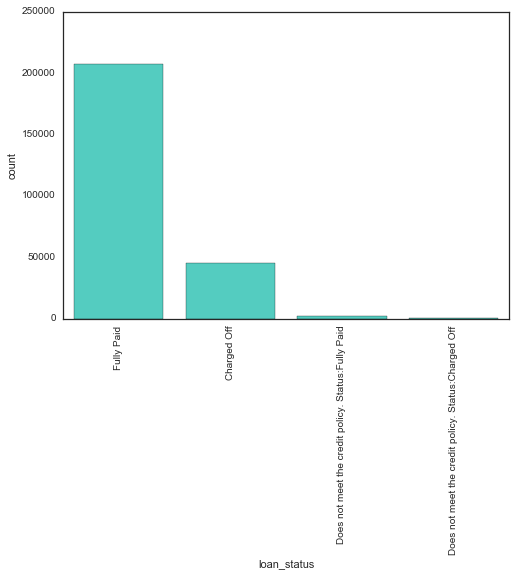

In [3]:
sns.countplot(loans['loan_status'], color='turquoise')
plt.xticks(rotation=90)
plt.show()
sns.countplot(closed_loans['loan_status'], color='turquoise')
plt.xticks(rotation=90)
plt.show()

### percentage charged off

The first question is what the percentage of 'charged off' loans actually is, so our investors know the risk. Lending club claims its around 4%. But in the loans that went to full term we see that the percentage is a shocking 18%. So hopefully lending club's selection of the loans will become better in the future in order to get this risk down. This is a question that is left for the future when the current loans went to full term.

In [4]:
nr_charged_off = (len(closed_loans[closed_loans['loan_status']=='Charged Off']) +
              len(closed_loans[closed_loans['loan_status']=='Does not meet the credit policy. Status:Charged Off']))
round(nr_charged_off / len(closed_loans) * 100)

18

### features

There are 74 features in this dataset. They are displayed below. A couple have to do with the loan (32) and a couple have to do with the one that's asking for the loan (39). A few are about loans that were applied for by more than one borrower, namely 'annual_inc_joint', 'dti_joint' and 'verification_status_joint'. But in the loans that went to full term there is only one loan that is not an individual loan, hence these features are not interesting in this case. Also a lot of features have missing values. If we concentrate only on features that have less than 5% missing values, we are left with only 48 features.


Loan
- id: loan
- loan_amnt: 1914 times is loan amount bigger than funded amount
- funded_amnt
- funded_amnt_inv 
- term: 36 or 60 months
- int_rate: interest rates
- installment: height monthly pay
- grade: A-G, A low risk, G high risk
- sub_grade
- issue_d: month-year loan was funded
- loan_status
- pymnt_plan: n/y
- url
- desc: description provided by borrower
- purpose: 'credit_card', 'car', 'small_business', 'other', 'wedding', 'debt_consolidation', 'home_improvement', 'major_purchase', 'medical', 'moving', 'vacation', 'house', 'renewable_energy','educational'
- title: provided by borrower
- initial_list_status: w/f (what is this?)
- out_prncp: outstanding prinicipal --> still >0 in fully paid?!
- out_prncp_inv
- total_pymnt
- total_pymnt_inv
- total_rec_prncp
- total_rec_int: total recieved interest
- total_rec_late_fee
- recoveries: post charged off gross recovery
- collection_recovery_fee: post charged off collection fee
- last_pymnt_d
- last_pymnt_amnt
- next_pymnt_d
- collections_12_mths_ex_med: almost all 0
- policy_code: 1 publicly available, 2 not
- application_type (only 1 JOINT, rest INDIVIDUAL)


Borrower
- emp_title
- emp_length: 0-10 (10 stands for >=10)
- home_ownership: 'RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'
- member_id: person
- annual_inc (stated by borrower)
- verification_status: 'Verified', 'Source Verified', 'Not Verified' (income verified by LC?)
- zip_code
- addr_state
- dti: debt to income (without mortgage)
- delinq_2yrs: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
- mths_since_last_delinq
- mths_since_last_record
- pub_rec
- earliest_cr_line
- inq_last_6mths 
- open_acc (nr of open credit lines)
- total_acc	(nr of total credit lines in credit file)
- revol_bal
- last_credit_pull_d
- mths_since_last_major_derog: Months since most recent 90-day or worse rating
- acc_now_delinq: The number of accounts on which the borrower is now delinquent.
- tot_coll_amt: Total collection amounts ever owed
- tot_cur_bal: Total current balance of all accounts
- open_acc_6m: Number of open trades in last 6 months
- open_il_6m: Number of currently active installment trades
- open_il_12m: Number of installment accounts opened in past 12 months
- open_il_24m
- mths_since_rcnt_il: Months since most recent installment accounts opened
- total_bal_il: Total current balance of all installment accounts
- il_util: Ratio of total current balance to high credit/credit limit on all install acct
- open_rv_12m: Number of revolving trades opened in past 12 months
- open_rv_24m
- max_bal_bc: Maximum current balance owed on all revolving accounts
- all_util: Balance to credit limit on all trades
- total_rev_hi_lim: Total revolving high credit/credit limit
- inq_fi: Number of personal finance inquiries
- total_cu_tl: Number of finance trades
- inq_last_12m: Number of credit inquiries in past 12 months

Two borrowers (only in 1 case)
- annual_inc_joint
- dti_joint
- verification_status_joint

In [5]:
nr_nulls = closed_loans.isnull().apply(sum, 0)
nr_nulls = nr_nulls[nr_nulls != 0]
print(nr_nulls.sort_values(ascending=False) / 255720)
print('nr of features having more than 5% missing values:', sum(nr_nulls.sort_values(ascending=False) / 255720 > 0.05))

dti_joint                      0.999996
annual_inc_joint               0.999996
verification_status_joint      0.999996
il_util                        0.999507
mths_since_rcnt_il             0.999453
total_cu_tl                    0.999437
open_acc_6m                    0.999437
open_il_6m                     0.999437
open_il_12m                    0.999437
open_il_24m                    0.999437
inq_last_12m                   0.999437
total_bal_il                   0.999437
open_rv_12m                    0.999437
open_rv_24m                    0.999437
max_bal_bc                     0.999437
all_util                       0.999437
inq_fi                         0.999437
next_pymnt_d                   0.989250
mths_since_last_record         0.873072
mths_since_last_major_derog    0.814074
desc                           0.645147
mths_since_last_delinq         0.555369
tot_cur_bal                    0.259882
tot_coll_amt                   0.259882
total_rev_hi_lim               0.259882


### limitations

To answer the questions about the 'charged off' status and whether investing with lending club is profitable we use only the loans that went to full term. The term the loans run are 3 or 5 years. And the latest loan information is from 2015. Hence the most recent loan we can look at is already from 2012 and the rest is even older. It might be that lending club has changed its protocols and the found results on this dataset might therefore not apply anymore on new loans. Also 1/3 of the features have so many missing values that they can't be used for analysis. There is one feature 'initial_list_status' where they do not explain what it means (values w/f), hence cannot be used for interpretation. Some of the features are unique for different loans like 'desc', 'url', 'id', 'title' and are therefore not interesting for our analysis. It might be that there are other features about a borrower that might have an influence on 'charged off' rate for instance 'gender', 'age', 'nr-of-kids', 'nr-of-pets', 'marital status', 'political preference'. But we will not be able to investigate this, since we are restricted to features that lending club collected. Also some features might have been registrered better for newer loans than older loans or in a different way (because protocols changed) and this might influence our results.

### cleaning and wrangling

First the selection of only loans that went to full term and selecting only the loans with not to much missing values. In a later stage, we want to use features for prediction that are selected based on their ability to lead to insights for new investors. Since we work with sklearn non-numerical features will have to be transformed to numerical features. Dates can be transformed into timestamps, categorical features will be transformed as good as possible into numerical values. Ordering is important for most algorithms, hence it's important to find an order in the categorical features to keep during transformation to numerical features. Also scaling/normalizing is important for some algorithms and we have to keep in mind that we have to use the exact same transformation for the test set as we did on the training set. Lastly, missing values, infinity and minus infinity values are not possible during prediction so also need to be transformed.

### other datasets

The American gouvernment has a lot of other datasets available that can be used in combination with this dataset. For instance both zipcode and state information is available. Hence we might add a feature that describes what the political preference is of the state the person lives in. Secondly we might transform the state feature to 'north/west/south/east'. Also we might use the average income for a certain zipcode or state as extra feature or the average age. 

 ## Explorations

### features of the loans

We will look at a few interesting features to see if what the loans characteristics look like. The funded amount turns out to be between 0 and 35,000. Hence more like an amount to buy a car than to buy a house. Lending club therefore competes with creditcards and consumer credits. The loans are either 3 or 5 years of length. Furthermore, the purpose of the loan could have something to do with the chance whether someone would pay the loan back. If it's for debt consolidation, someone has more loans and therefore will probably be more likely to get into trouble. As it turns out almost all loans are for debt consolidation or creditcard debt, which is practically the same thing. Hence it looks like not the most interesting to base your choice of investment on. Moreover, debt-to-income seems of course also a very interesting feature. But the difference between loans that were paid fully or is only 16% debt-to-income versus 18% debt-to-income. Nevertheless, this difference is significant with a T-test. Lastly, people with a mortgage do seem to pay off their loans more often than people who rent. The order is mortgage (16% charged off), own (18% charged off) and rent (20% charged off).

/Users/ro.d.bruijn/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


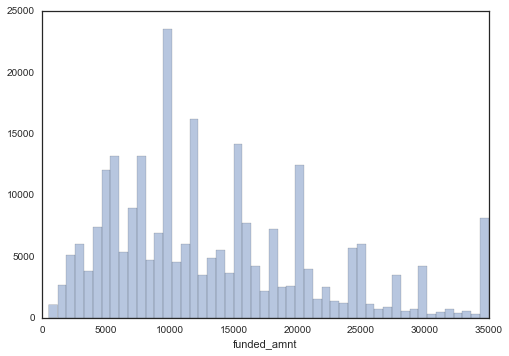

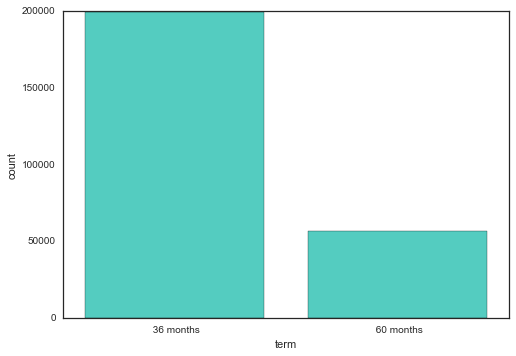

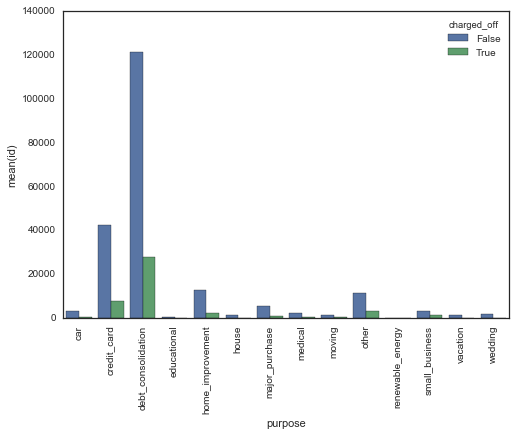

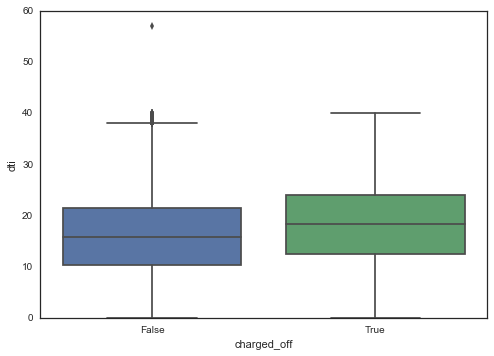

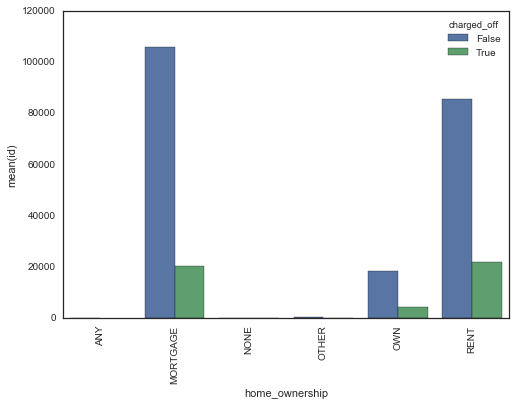

In [6]:
paid_status = ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']
closed_loans['charged_off'] = [False if loan in paid_status else True for loan in closed_loans['loan_status']]
sns.distplot(closed_loans['funded_amnt'], kde=False, bins=50)
plt.show()
sns.countplot(closed_loans['term'], color='turquoise')
plt.show()
purpose_paid = closed_loans.groupby(['purpose', 'charged_off'])['id'].count()
sns.barplot(data=pd.DataFrame(purpose_paid).reset_index(), x='purpose', y='id', hue='charged_off')
plt.xticks(rotation=90)
plt.show()
sns.boxplot(data=closed_loans, x='charged_off', y='dti')
plt.show()
home_paid = closed_loans.groupby(['home_ownership', 'charged_off'])['id'].count()
sns.barplot(data=pd.DataFrame(home_paid).reset_index(), x='home_ownership', y='id', hue='charged_off')
plt.xticks(rotation=90)
plt.show()

In [7]:
from scipy.stats import ttest_ind
print(ttest_ind(closed_loans[closed_loans['charged_off']==True]['dti'], closed_loans[closed_loans['charged_off']==False]['dti']))
print((closed_loans[closed_loans['charged_off']==True]['dti']).mean())
print((closed_loans[closed_loans['charged_off']==False]['dti']).mean())

Ttest_indResult(statistic=55.606880079219287, pvalue=0.0)
18.3359827425
16.1198932817


In [8]:
print(closed_loans.groupby(['home_ownership', 'charged_off'])['id'].count()[1:3])
print(closed_loans.groupby(['home_ownership', 'charged_off'])['id'].count()[7:11])
print('mortgage:', 20226/(105874+20226))
print('own:', 4074/(18098+4074))
print('rent:', 21663/(85557+21663))

home_ownership  charged_off
MORTGAGE        False          105874
                True            20226
Name: id, dtype: int64
home_ownership  charged_off
OWN             False          18098
                True            4074
RENT            False          85557
                True           21663
Name: id, dtype: int64
mortgage: 0.16039651070578906
own: 0.18374526429731192
rent: 0.20204252937884723


### grade

Lending club has made its own risk assesment of the loans and gives them categories namely A-F. Including subcategories like A1 etc. As we can see below, the proportion of loans that get charged off does increase nicely with the increase in risk category (grade). In the highest risk still more than half gets fully paid. To compensate for the higher risk, investors in these higher risk loans get higher interest rates. Although it's not completely linear. 

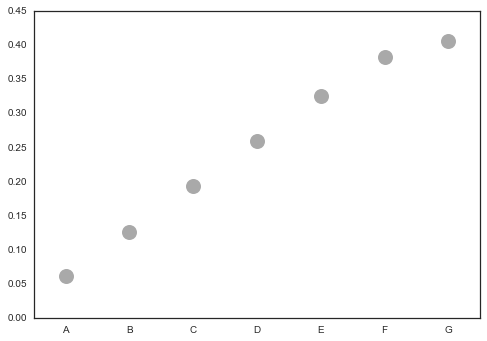

In [9]:
grade_paid = closed_loans.groupby(['grade', 'charged_off'])['id'].count()
risk_grades = dict.fromkeys(closed_loans['grade'].unique())
for g in risk_grades.keys():
    risk_grades[g] = grade_paid.loc[(g, True)] / (grade_paid.loc[(g, False)] + grade_paid.loc[(g, True)])
risk_grades = pd.DataFrame(risk_grades, index=['proportion_unpaid_loans'])    
sns.stripplot(data=risk_grades, color='darkgray', size=15)

/Users/ro.d.bruijn/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


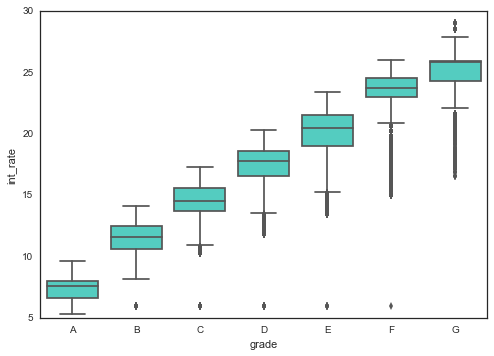

In [10]:
closed_loans['grade'] = closed_loans['grade'].astype('category', ordered=True)
sns.boxplot(data=closed_loans, x='grade', y='int_rate', color='turquoise')

To answer the question whether it's profitable to invest in the higher risk categories. One could calculate the charged off % and calculate the average interest rate. But than you don't take into account that some loans might default very quickly and other loans might default right before the end and this difference makes a huge difference in how much profit/loss one got on that loan. Hence it's important to know how much money came back in total per loan minus the money one put in to see if it turned out to be profitable in the end. Therefore 'total_recevied_interest', 'total_recieved_principal', 'total_recieved_late_fee', 'recoveries', 'collections_12_mths_ex_med' will all be used as income from the loan. While 'funded_amount' is seen as what was put in in the loan at the start and 'collection_recovery_fee' is what was paid to the person who collected the money that was recovered after the loan was charged off. This leads to the conclusion that of one had invested in all loans of that category only the A-C category was profitable and that the higher interest rates of the riskier categories did not compensate for the loss of money due to charging off of the loans.

/Users/ro.d.bruijn/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


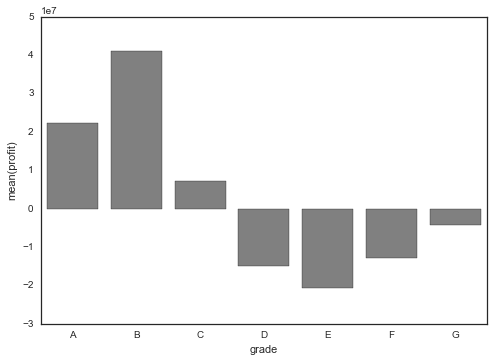

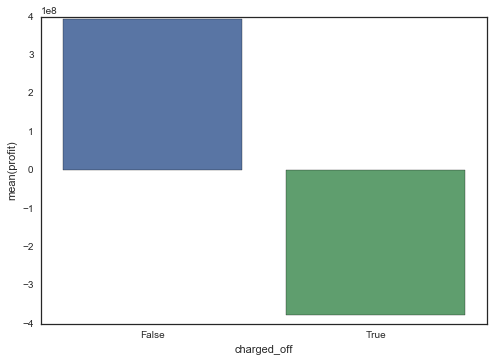

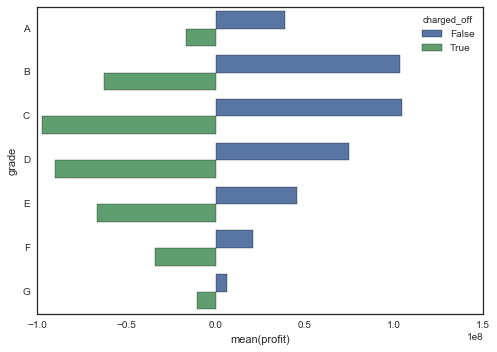

In [11]:
closed_loans['profit'] = (closed_loans['total_rec_int'] + closed_loans['total_rec_prncp'] + closed_loans['collections_12_mths_ex_med']
                          + closed_loans['total_rec_late_fee'] + closed_loans['recoveries'] - closed_loans['funded_amnt'] 
                          - closed_loans['collection_recovery_fee'])
profits = closed_loans.groupby('grade')['profit'].sum()
sns.barplot(data=profits.reset_index(), x='grade', y='profit', color='gray')
plt.show()
profits = closed_loans.groupby('charged_off')['profit'].sum()
sns.barplot(data=profits.reset_index(), x='charged_off', y='profit')
plt.show()
profits = closed_loans.groupby(['grade', 'charged_off'])['profit'].sum()
sns.barplot(data=profits.reset_index(), x='profit', y='grade', hue='charged_off', orient='h')
plt.show()

## Prediction

To give some insights into which features are useful for new investors to pay attention to when selecting a loan to invest in we will predict whether a loan will end in 'charged off'. For this purpose we use algorithms that only use the 'grade' feature as a feature for prediction as a baseline and see whether we can find other features that are also useful. Both logistic regression and random forest will be used as algorithms. The first one is easy to use and easier to get insights from and the latter is widely used due to its generally good performance. As evaluation metric we will be using the F1-score, confusion matrices and ROC-cuves/AUC-scores. 